# FPL 18 Figures

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from net import VGG16, RESNET50, MOBILENET_V1, MOBILENET_V2

In [3]:
matplotlib.rcParams.update({'font.size': 14})

## Characterisation of Four Example Networks

In [4]:
net_stat = pd.read_csv('data/net_stat.csv')
net_stat

,Model Name,# Block Params,# Conv Params,# FC Params,# Block Ops,# Conv Ops,# FC Ops,# Total Params,# Total Ops
0,ResNet-50,23400000.0,9410.0,2050000.0,7.480000e+09,238000000.0,4100000.0,25500000.0,7.720000e+09
1,MobileNetV1,3180000.0,864.0,1024000.0,1.110000e+09,21900000.0,2048000.0,4210000.0,1.140000e+09
2,MobileNetV2,1780000.0,410464.0,1280000.0,5.460000e+08,62010800.0,2560000.0,3470000.0,6.110000e+08


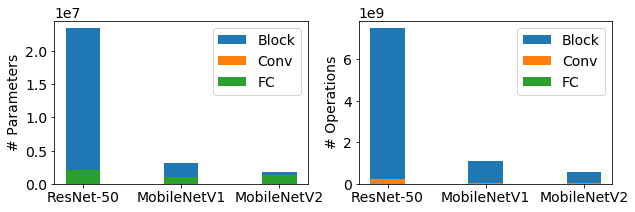

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ind = np.arange(len(net_stat.index))
width = 0.35

ax[0].bar(ind, net_stat['# Block Params'].tolist(), width, label='Block')
ax[0].bar(ind, net_stat['# Conv Params'].tolist(), width, label='Conv')
ax[0].bar(ind, net_stat['# FC Params'].tolist(), width, label='FC')

ax[0].set_xticks(ind)
ax[0].set_xticklabels(tuple(net_stat['Model Name'].tolist()))
ax[0].set_ylabel('# Parameters')
ax[0].legend()

ax[1].bar(ind, net_stat['# Block Ops'].tolist(), width, label='Block')
ax[1].bar(ind, net_stat['# Conv Ops'].tolist(), width, label='Conv')
ax[1].bar(ind, net_stat['# FC Ops'].tolist(), width, label='FC')

ax[1].set_xticks(ind)
ax[1].set_xticklabels(tuple(net_stat['Model Name'].tolist()))
ax[1].set_ylabel('# Operations')
ax[1].legend()

fig.savefig('net_stat.pdf', bbox_inches='tight')

## VGG-16 Layer Replacement

In [8]:
vgg16_replace = pd.read_csv('data/vgg16_replace.csv')
vgg16_dist = pd.read_csv('data/vgg16_dist.csv')

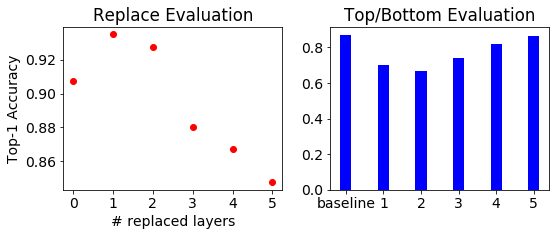

In [29]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 3.5))

ind = np.arange(len(vgg16_replace.index))
ax[0].plot(ind, vgg16_replace['accuracy'].tolist(), 'o', color='r')
ax[0].set_xticks(ind)
ax[0].set_xlabel('# replaced layers')
ax[0].set_ylabel('Top-1 Accuracy')
ax[0].set_title('Replace Evaluation')
# ax[0].set_xticklabels(vgg16_replace['replaced_layers'])

width = 0.3
ind = np.arange(len(vgg16_dist.index))
ax[1].bar(ind, vgg16_dist['accuracy'].tolist(), width, color='b')
ax[1].set_xticks(ind)
ax[1].set_xticklabels(vgg16_dist['group_id'].tolist())
ax[1].set_title('Top/Bottom Evaluation')

fig.tight_layout()
fig.savefig('vgg16_eval.pdf')

## End-to-End Framework Evaluation

In [31]:
end2end = pd.read_csv('end2end.csv')
end2end

,model_name,accuracy,performance,latency,size
0,VGG-16,0.9075,752.36,37.20,138.34
1,ResNet-50,0.9350,655.70,10.30,24.30
2,MobileNetV1,0.8825,182.87,6.22,4.21
3,MobileNetV2,0.8750,95.34,6.40,3.47


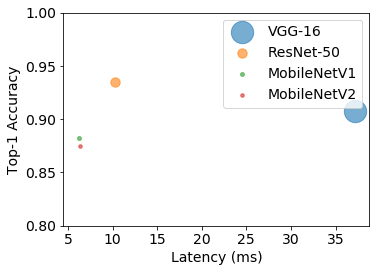

In [67]:
fig, ax = plt.subplots(figsize=(5.5, 4))

for i in range(len(end2end.index)):
    ax.scatter(end2end['latency'].tolist()[i], end2end['accuracy'].tolist()[i],
               s=500 * end2end['size'].tolist()[i] / end2end['size'].tolist()[0],
               alpha=0.6,
               label=end2end['model_name'].tolist()[i])
    
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Top-1 Accuracy')
ax.set_ylim([0.8, 1.0])
ax.legend()

fig.tight_layout()
fig.savefig('end2end.pdf')